In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('combined Data.csv')
df.shape

(1571, 16)

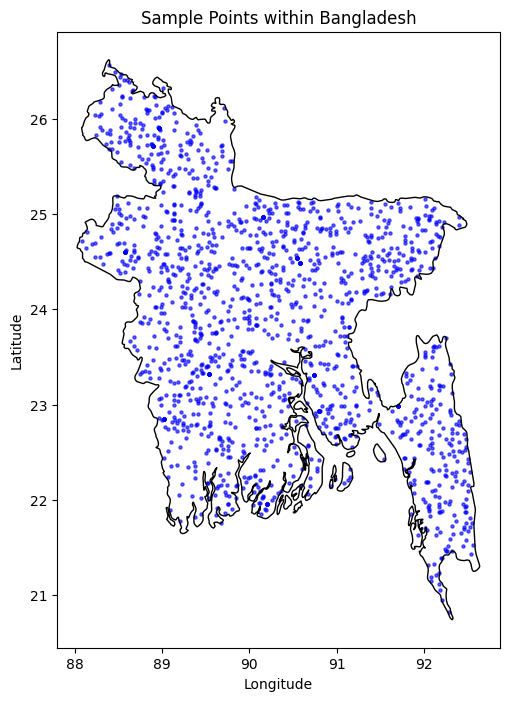

In [ ]:
# show the point on the BD map

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load your CSV data

# Create GeoDataFrame from latitude/longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Load Bangladesh boundary GeoJSON
bd = gpd.read_file('bangladesh_boundary.geojson')

# Spatial join to keep points only inside Bangladesh polygon
points_in_bd = gpd.sjoin(gdf, bd, how='inner', predicate='within')

# Plot Bangladesh boundary and points inside
fig, ax = plt.subplots(figsize=(10, 8))
bd.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
points_in_bd.plot(ax=ax, color='blue', markersize=5, alpha=0.6)
plt.title("Sample Points within Bangladesh")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


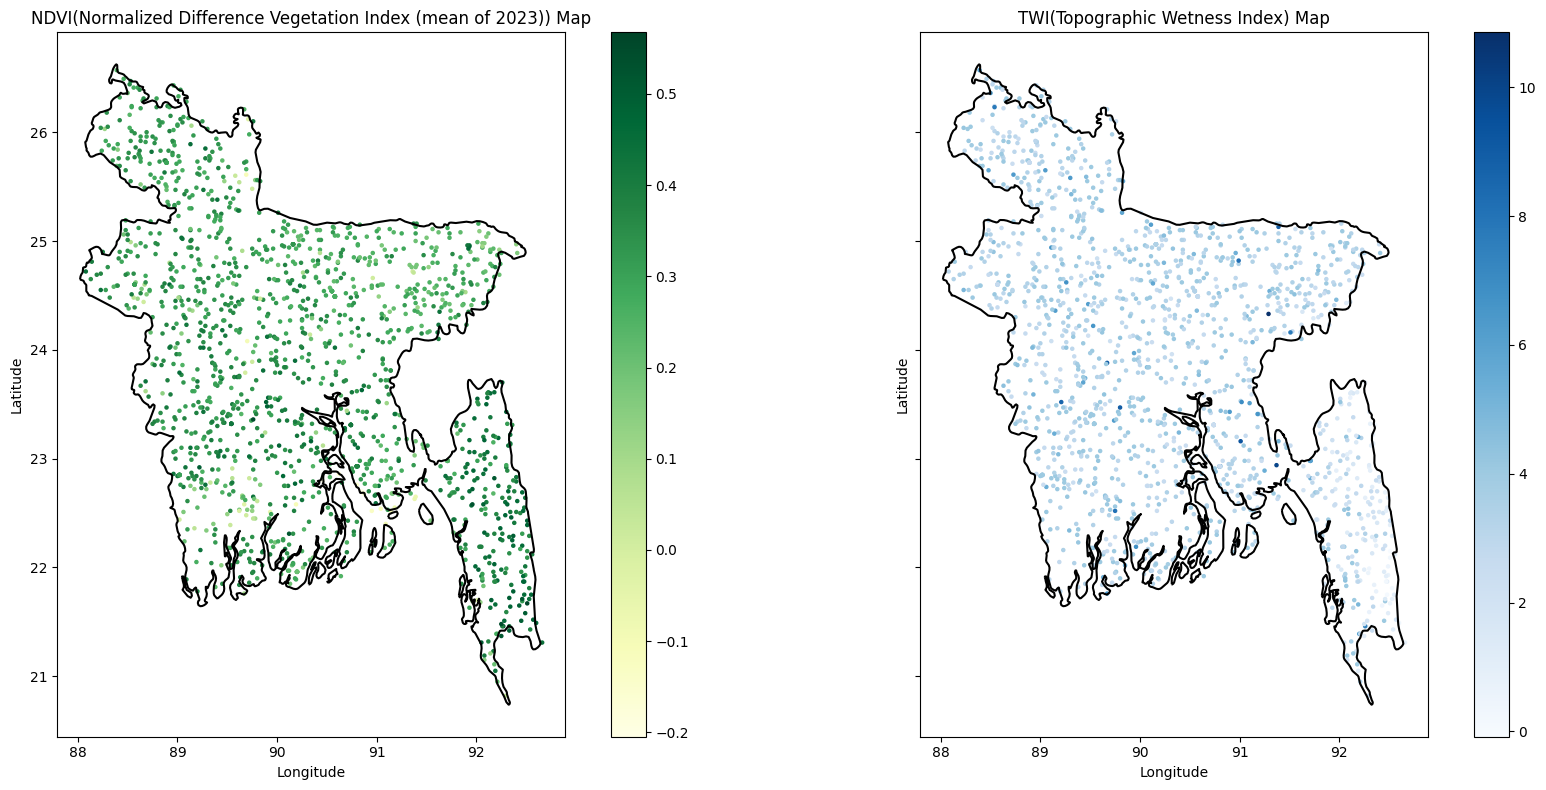

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

# NDVI Map
bd.boundary.plot(ax=axes[0], edgecolor='black')
gdf.plot(column='NDVI', ax=axes[0], legend=True, cmap='YlGn', markersize=5)
axes[0].set_title("NDVI(Normalized Difference Vegetation Index (mean of 2023)) Map")

# TWI Map
bd.boundary.plot(ax=axes[1], edgecolor='black')
gdf.plot(column='TWI', ax=axes[1], legend=True, cmap='Blues', markersize=5)
axes[1].set_title("TWI(Topographic Wetness Index) Map")

for ax in axes:
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

[4 7 6 5 1 9]


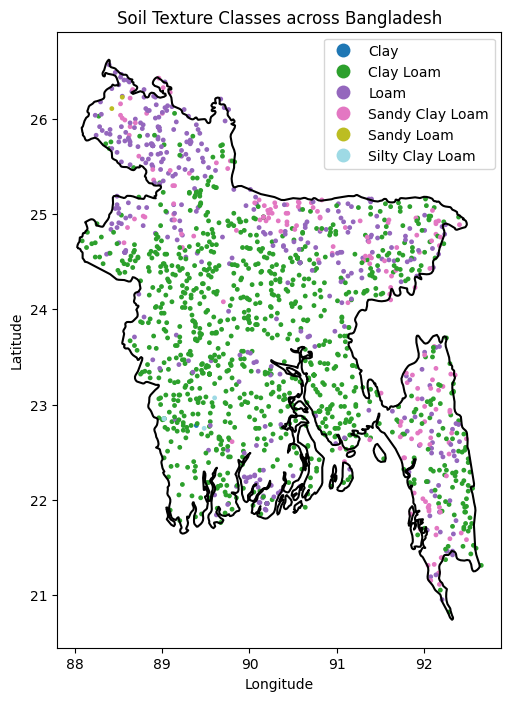

In [ ]:
# Mapping dictionary
soil_texture_map = {
    1: 'Clay',
    2: 'Silty Clay',       
    3: 'Sandy Clay',       
    4: 'Clay Loam',      
    5: 'Silty Clay Loam',    
    6: 'Sandy Clay Loam',     
    7: 'Loam',        
    8: 'Silty Loam',       
    9: 'Sandy Loam',      
    10: 'Silt',       
    11: 'Loamy Sand',    
    12: 'Sand'        
}


gdf['SoilTextureClass'] = pd.to_numeric(gdf['SoilTextureClass'], errors='coerce')
# Map numeric codes to class labels
gdf['SoilTextureLabel'] = gdf['SoilTextureClass'].map(soil_texture_map)

fig, ax = plt.subplots(figsize=(10, 8))
bd.boundary.plot(ax=ax, edgecolor='black')

# Plot with categorical colors
gdf.plot(
    column='SoilTextureLabel',
    ax=ax,
    legend=True,
    categorical=True,
    markersize=6,
    cmap='tab20'  # or 'Set3', 'tab10', etc.
)

plt.title("Soil Texture Classes across Bangladesh")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [19]:
summary = gdf.groupby('SoilTextureLabel')[['NDVI', 'El', 'TWI', 'SPI']].mean().round(3)
print(summary)

                   NDVI      El    TWI    SPI
SoilTextureLabel                             
Clay              0.286   5.000  3.535  0.007
Clay Loam         0.314  29.937  3.406  0.144
Loam              0.313  31.637  3.460  0.348
Sandy Clay Loam   0.302  39.287  3.115  0.038
Sandy Loam        0.324  61.000  5.121  0.363
Silty Clay Loam   0.342   7.000  3.588  0.001


/tmp/ipykernel_7413/401706853.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=gdf, x='SoilTextureLabel', y='NDVI', ci=None)


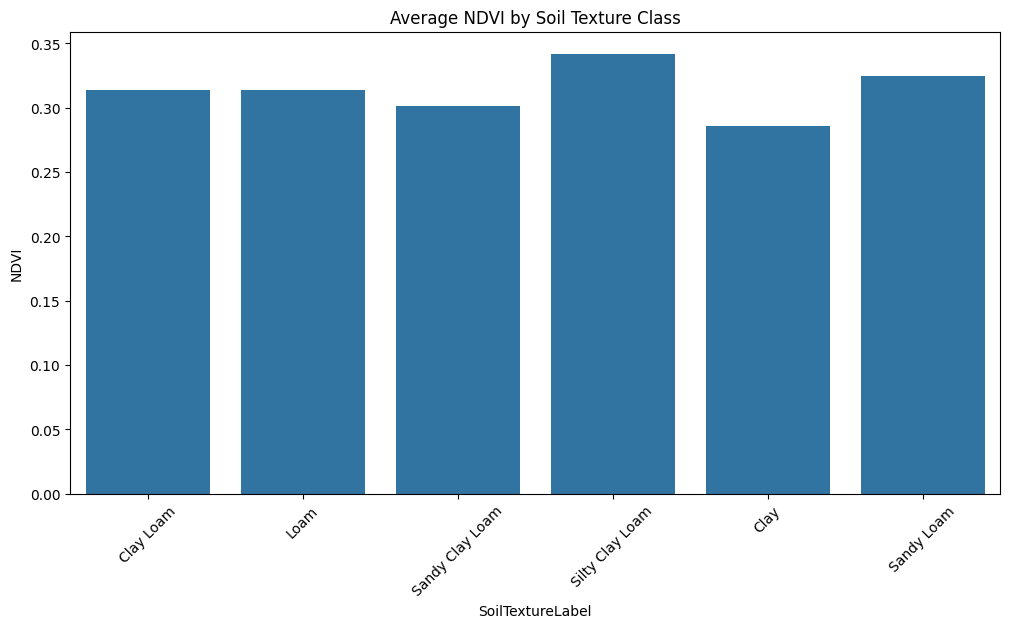

In [21]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=gdf, x='SoilTextureLabel', y='NDVI', ci=None)
plt.xticks(rotation=45)
plt.title("Average NDVI by Soil Texture Class")
plt.show()

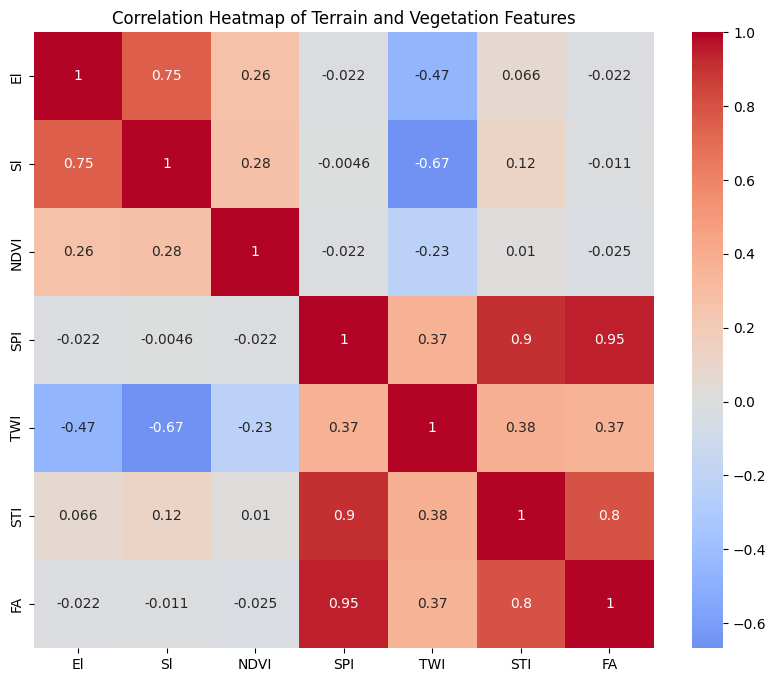

In [22]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
numerical_cols = ['El', 'Sl', 'NDVI', 'SPI', 'TWI', 'STI', 'FA']
corr = gdf[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Terrain and Vegetation Features")
plt.show()